In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as fit

In [2]:
data = {
    "mass": [50, 90, 130, 170, 210, 250],
    "mass_err": [1] * 6, 
    "gravforce": [0.49, 0.88, 1.28, 1.67, 2.06, 2.45],
    "gravforce_err": [0.01] * 6, 
    "deltaL": [6.56, 9.37, 12.27, 15.20, 18.23, 21.07],
    "deltaL_err": [0.05] * 6
}

df = pd.DataFrame(data)
display(df)

,mass,mass_err,gravforce,gravforce_err,deltaL,deltaL_err
0,50,1,0.49,0.01,6.56,0.05
1,90,1,0.88,0.01,9.37,0.05
2,130,1,1.28,0.01,12.27,0.05
3,170,1,1.67,0.01,15.20,0.05
4,210,1,2.06,0.01,18.23,0.05
5,250,1,2.45,0.01,21.07,0.05


In [3]:
x = df["gravforce"]
y = df["deltaL"]
y_err = df["deltaL_err"]

def f(x, m):
   return m * x
p0 = [1.0]
params, pcov = fit.curve_fit(f, x, y, p0 = p0, sigma=y_err, absolute_sigma=True)
print("params:", params)
print("pcov:", pcov)

m = params[0]
m_err = np.sqrt(pcov[0][0])

print(f"Slope (m) = {m:.4f} cm/N")
print(f"Uncertainty in m = {m_err:.4f} cm/N")

m = float(params[0])

params: [9.03402622]
pcov: [[0.00015936]]
Slope (m) = 9.0340 cm/N
Uncertainty in m = 0.0126 cm/N


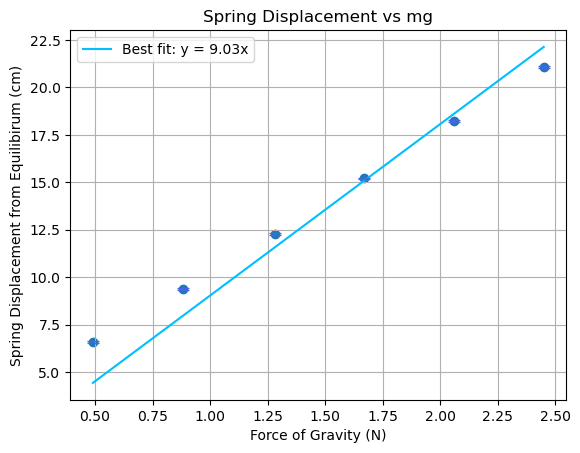

In [4]:
plt.plot(x, m * x, label=f"Best fit: y = {m:.2f}x", color="deepskyblue")
plt.scatter(x, y)
plt.errorbar(x, y, yerr=y_err, fmt=" ", capsize=4, color="royalblue")
plt.title("Spring Displacement vs mg")
plt.xlabel("Force of Gravity (N)")
plt.ylabel("Spring Displacement from Equilibirum (cm)")
plt.legend()
plt.grid()
plt.show()

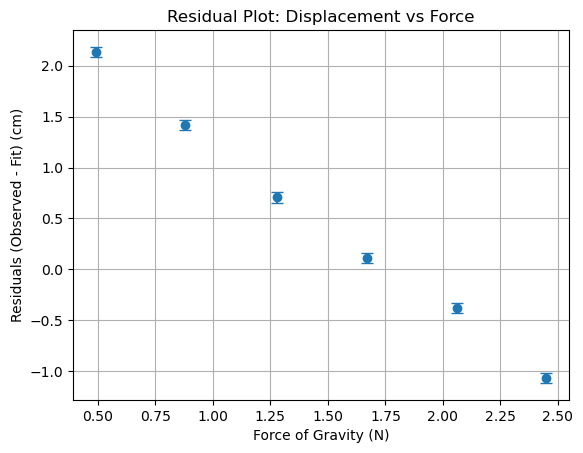

In [5]:
y_fit = f(x, m)
residuals = y - y_fit

plt.errorbar(x, residuals, yerr=y_err, fmt="o", capsize=4)
plt.xlabel("Force of Gravity (N)")
plt.ylabel("Residuals (Observed - Fit) (cm)")
plt.title("Residual Plot: Displacement vs Force")
plt.grid()
plt.show()

In [6]:
x = df["gravforce"]
y = df["deltaL"]
y_err = df["deltaL_err"]

def f(x, m, c):
   return m * x + c

p0 = [1, 0]
params, pcov = fit.curve_fit(f, x, y, p0 = p0, sigma=y_err, absolute_sigma=True)
m = float(params[0])
c = float(params[1])

print("params:", params)
print("pcov:\n", pcov)

params: [7.43314045 2.8442283 ]
pcov:
 [[ 0.0009283  -0.00136615]
 [-0.00136615  0.00242719]]


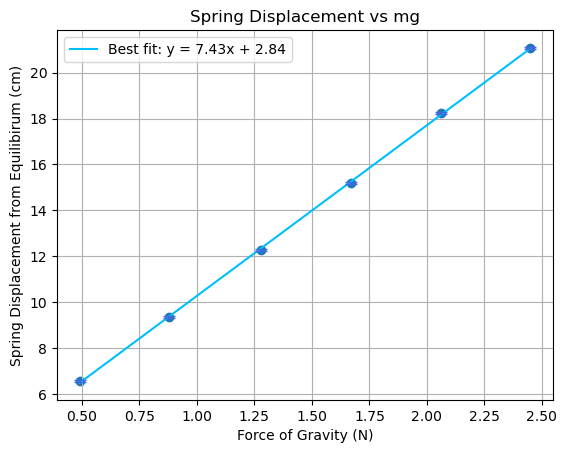

In [7]:
plt.plot(x, m * x + c, label=f"Best fit: y = {m:.2f}x + {c:.2f}", color="deepskyblue")
plt.scatter(x, y)
plt.errorbar(x, y, yerr=y_err, fmt=" ", capsize=4, color="royalblue")
plt.title("Spring Displacement vs mg")
plt.xlabel("Force of Gravity (N)")
plt.ylabel("Spring Displacement from Equilibirum (cm)")
plt.legend()
plt.grid()
plt.show()

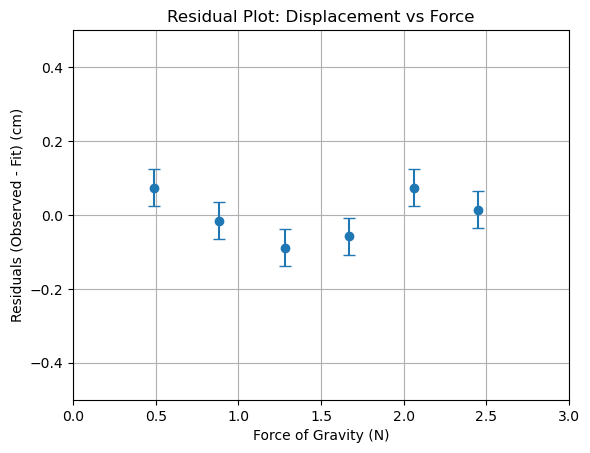

In [8]:
y_fit = f(x, m, c)
residuals = y - y_fit

plt.errorbar(x, residuals, yerr=y_err, fmt="o", capsize=4)
plt.axis([0, 3, -0.5, 0.5])
plt.xlabel("Force of Gravity (N)")
plt.ylabel("Residuals (Observed - Fit) (cm)")
plt.title("Residual Plot: Displacement vs Force")
plt.grid()
plt.show()